In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('./python-data-analysis-master/data/titanic_train.csv')
df_test = pd.read_csv("./python-data-analysis-master/data/titanic_test.csv")
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


## 불필요한 피처 제거하기


In [4]:
#데이터셋에서 name, ticket, body, home.dest 피처를 제거
df_train = df_train.drop(['name', 'ticket','body','cabin','home.dest'], axis =1)
df_test = df_test.drop(['name', 'ticket','body','cabin','home.dest'], axis =1)

# 탐색적 데이터 분석하기

0    563
1    353
Name: survived, dtype: int64


<AxesSubplot:>

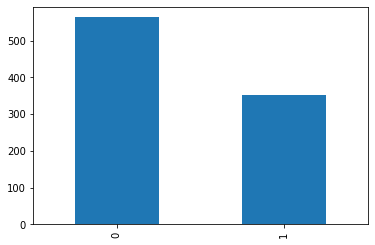

In [5]:
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

3    498
1    230
2    188
Name: pclass, dtype: int64


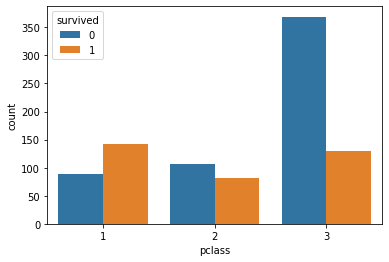

In [6]:
#survived 피처를 기준으로 그룹을 나누어 pclass 피처의 분포를 확인
print(df_train['pclass'].value_counts())

ax =  sns.countplot(x = 'pclass', hue = 'survived', data = df_train)

In [7]:
df_test['fare']

0        7.8958
1       21.0000
2       27.0000
3       14.5000
4       31.5000
         ...   
388      7.8542
389     21.0000
390      7.7500
391      7.7500
392    151.5500
Name: fare, Length: 393, dtype: float64

In [8]:
# 수치형 피처들에 대한 탐색
#분포, 표준편차, T-test 검정, Shapiro-wilk
#Shapiro-wilk  주어진 데이터가 얼마나 정규성을 따르는지 즉 얼마나 정규분포에 가까운지를 측정

from scipy import stats 

#두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check = True):
    #두 집단 (survived = 1, survived = 0)의 분포 그래프를 출력합니다
    g = sns.FacetGrid(df, col = 'survived')
    g.map(plt.hist, col_name, bins = 30)
    
    #두 집단 (survived = 1, survived = 0)의 표준편차를 각각 출력
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is','%.2f' % np.std(titanic_survived_static))
    
    titanic_n_survived = df[df['survived'] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print('data std is','%.2f' % np.std(titanic_n_survived_static))
    
    # T-test 두 집단의 평균 차이를 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name],equal_var=False)
    print("The t-statistic and p-valu assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-valu not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)    
    if distribution_check:
        #Shapiro-Wilk 검정: 분포의 정규성 정도를 검증
        print("The w-static and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-static and p-value in None-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))


data std is 14.22
data std is 13.71
The t-statistic and p-valu assuming equal variances is -0.546 and 0.585.
The t-statistic and p-valu not assuming equal variances is -0.543 and 0.587.
The w-static and p-value in Survived 0.982 and 0.001
The w-static and p-value in None-Survived 0.968 and 0.000
----------------------------------------------------------------
data std is 0.64
data std is 1.34
The t-statistic and p-valu assuming equal variances is -2.118 and 0.034.
The t-statistic and p-valu not assuming equal variances is -2.446 and 0.015.


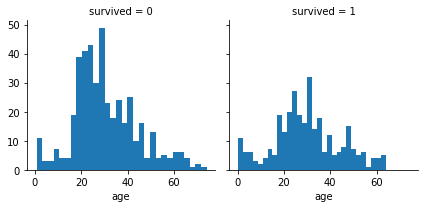

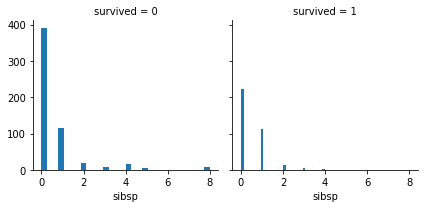

In [9]:
#자동화 함수 실행
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
print('----------------------------------------------------------------')
valid_features(df_train, 'sibsp', distribution_check=False)

#분석 결과 age피처는 두 그룹 간의 평균 차이가 없기 때문에 생존자 분류에 미치는 영향력이 낮음
#sibsp 피처에서 두 그룹간의 평균 차이가 어느정도 존재한 것을 볼수 있다 

male      581
female    335
Name: sex, dtype: int64
S    652
C    179
Q     83
Name: embarked, dtype: int64
data std is 0.74
data std is 0.89
The t-statistic and p-valu assuming equal variances is 1.865 and 0.063.
The t-statistic and p-valu not assuming equal variances is 1.942 and 0.052.
data std is 60.68
data std is 33.65
The t-statistic and p-valu assuming equal variances is 7.523 and 0.000.
The t-statistic and p-valu not assuming equal variances is 6.657 and 0.000.


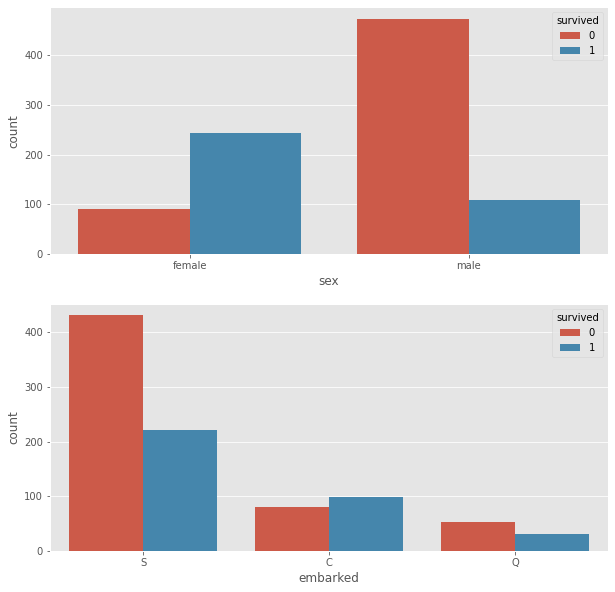

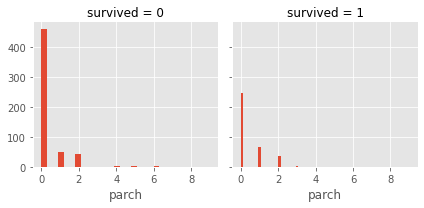

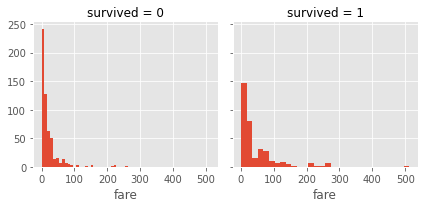

In [10]:
# valid_features(df_train, 'sex', distribution_check=False)
# valid_features(df_train, 'embarked', distribution_check=False)
plt.style.use('ggplot')

figure, (ax1, ax2) = plt.subplots(nrows=2)
figure.set_size_inches(10,10)
print(df_train['sex'].value_counts())
sns.countplot(x = 'sex', hue = 'survived', data = df_train, ax=ax1)
print(df_train['embarked'].value_counts())
sns.countplot(x = 'embarked', hue = 'survived', data = df_train, ax = ax2)
valid_features(df_train, 'parch', distribution_check=False)
valid_features(df_train, 'fare', distribution_check=False)



In [11]:
#두 그룹 간의 분포 혹은 평균의 차이가 있는가 
#pclass O age X parch 세모, fare O , sex O embark 세모

# 분류: 생존자 분류 모델만들기 
- 로지스틱 회귀모델

#####  결측값 처리방법
1. 결측이 존재하는 데이터들을 삭제하는 방법
2. 평균값, 혹은 중앙값이나 최반값 등의 임의의 수치로 채워 넣는 방법

In [12]:
print(df_train.isnull().sum(), df_test.isnull().sum())

pclass        0
survived      0
sex           0
age         175
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64 pclass       0
survived     0
sex          0
age         88
sibsp        0
parch        0
fare         0
embarked     0
dtype: int64


In [13]:
#범주형 데이터 원핫 인코딩사용

#age의 결측값을 평균값으로 대체합니다
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
#train의 평균값을 test에도 넣어준다
df_test['age'] = df_test['age'].fillna(replace_mean)

In [14]:
#embark : 2개의 결측 값을 최빈 값으로 대체 
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [15]:
#원-핫 인코딩을 위한 통합 데이터프레임(whole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

#pandas 패키지를 이용한 원핫 인코딩 수행
whole_df_encode = pd.get_dummies(whole_df)
df_train =whole_df_encode[:train_idx_num]
df_test = whole_df_encode[train_idx_num:]

df_train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


## 분류 모델링: 로지스틱 회귀 모델


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#데이터를 학습 데이터 셋, 테스트 데이터셋 분리 
x_train, y_train  = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test  = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

#로지스틱 회귀 모델 사용
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

#학습한 모델의 테스트 데이터 셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

c:\users\wodud\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Confusion Matrix
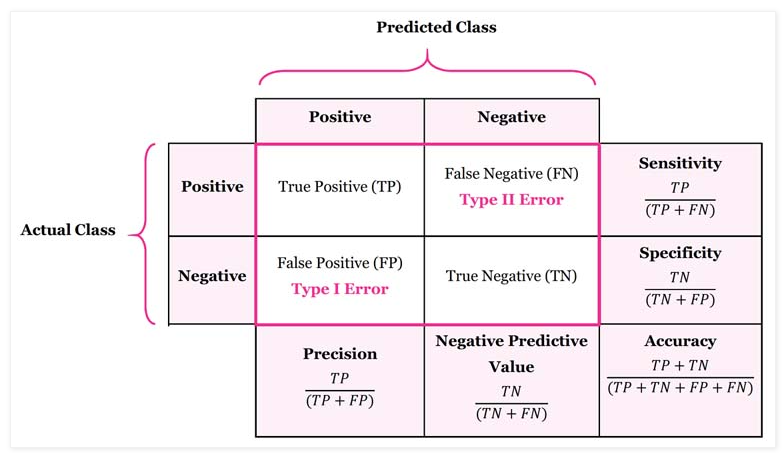
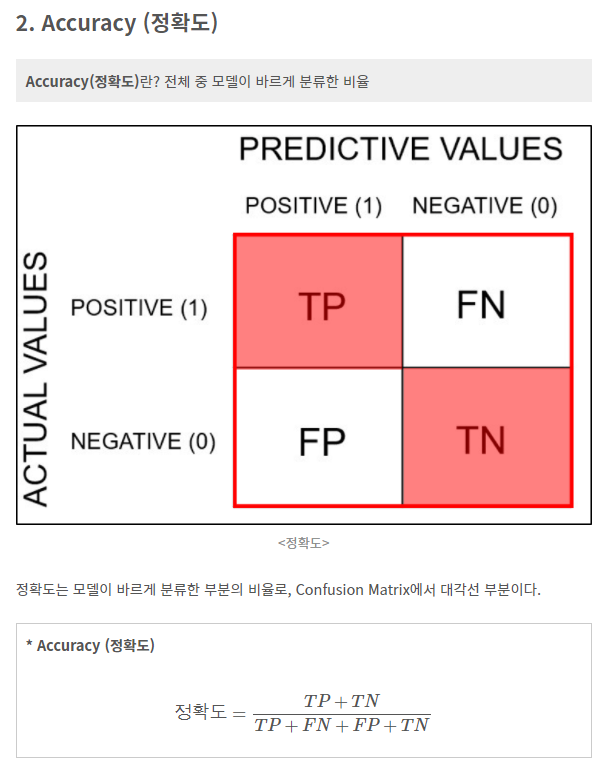
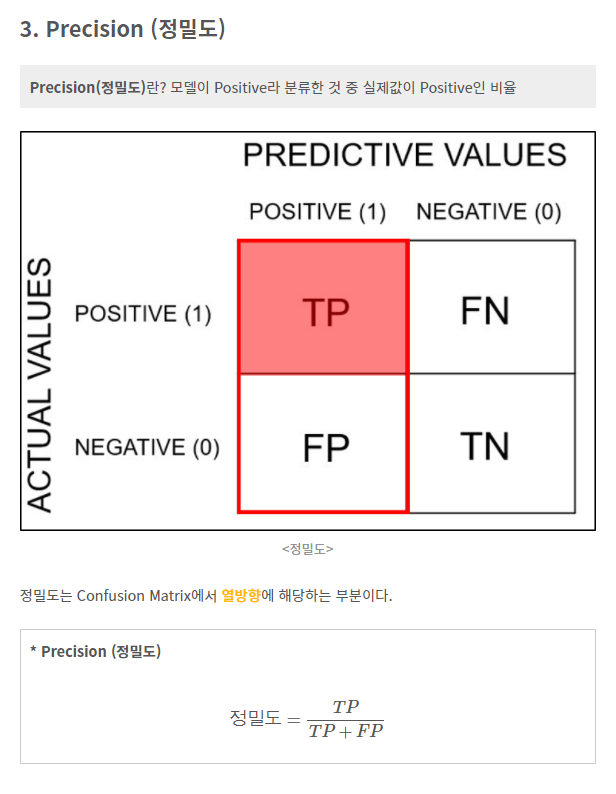
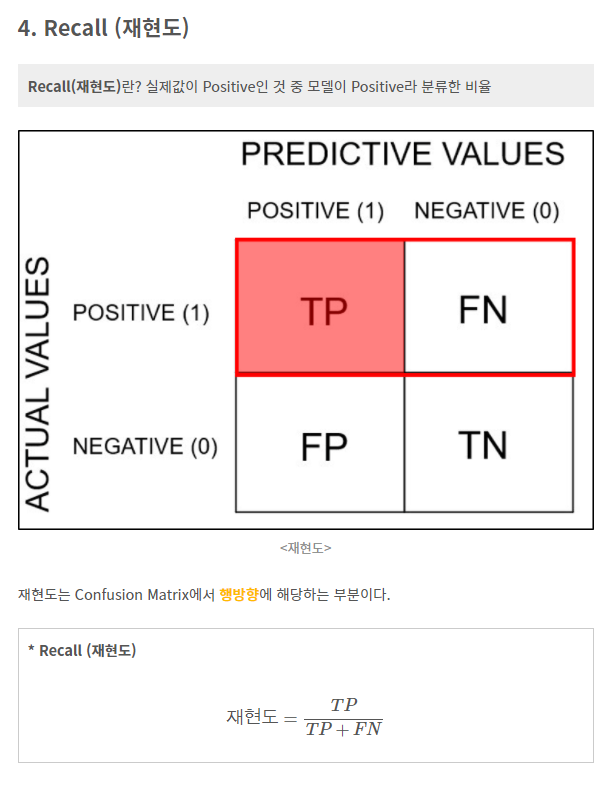
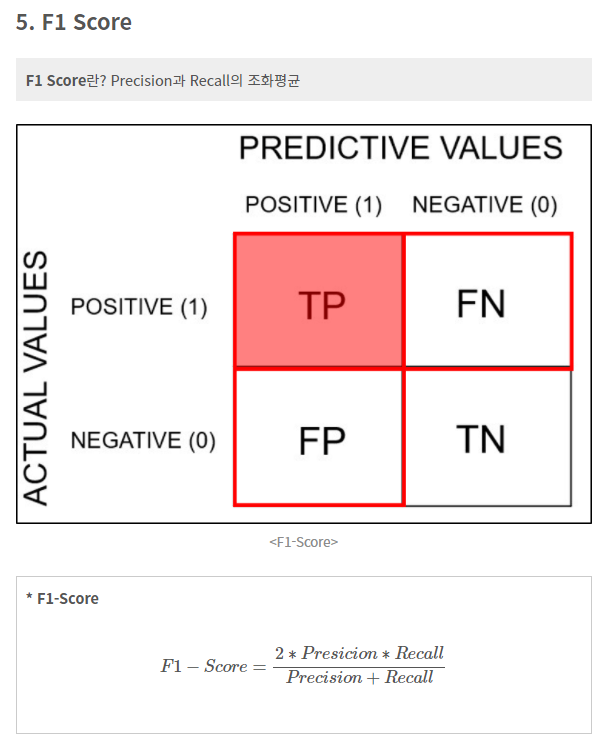
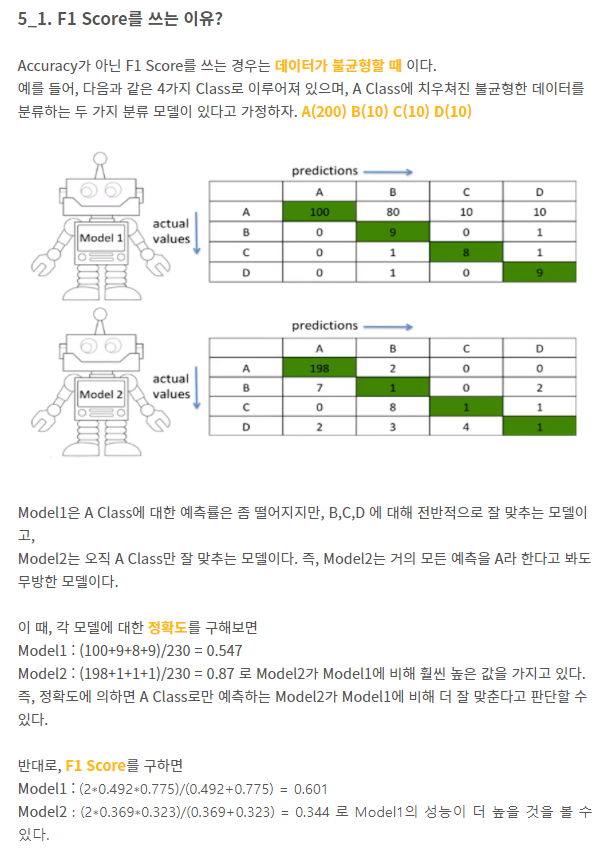
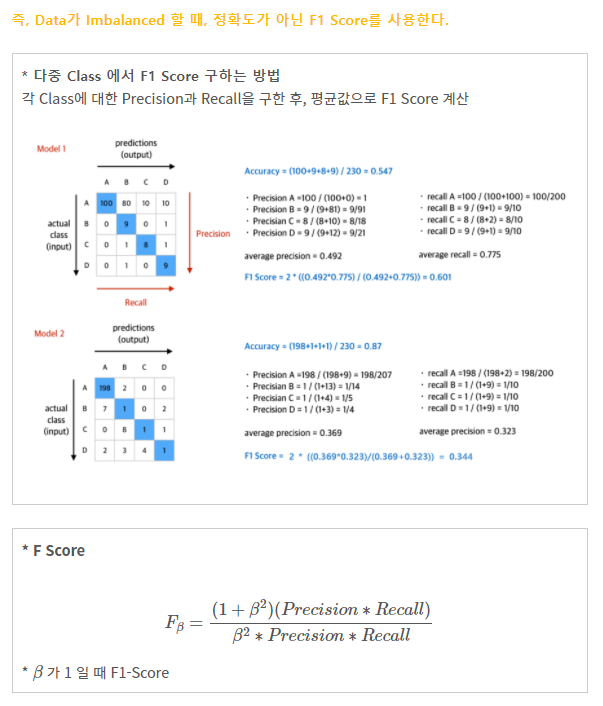

In [17]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision_score: %.2f' % precision_score(y_test, y_pred))
print('recall_score: %.2f' % recall_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.80
precision_score: 0.76
recall_score: 0.67
f1_score: 0.71


In [18]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix 
confmat = confusion_matrix(y_test, y_pred)
print(confmat)

[[214  32]
 [ 48  99]]


# AUC 
- 분류 결과인 0 혹은 1의 y 값(y_pred)을 사용하는 것이 아니라 분류 직전의 확률값(y_pred_probability)인 0~1사이의 값을 사용
- AUC와 ROC커브 동시 출력을 보여준다

AUC : 0.838


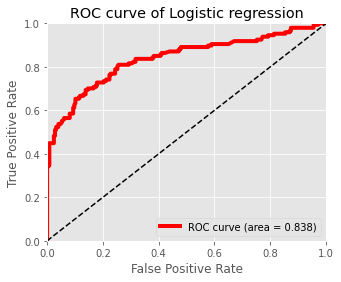

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

#AUC (Area Under the Curve)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)

roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC : %.3f' % roc_auc)

#ROC curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = 'ROC curve (area = %.3f)' % roc_auc, color = 'red', linewidth = 4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])  #눈금
plt.ylim([0.0,1.0])  #눈금 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc = 'lower right')

accuracy: 0.74
precision_score: 0.67
recall_score: 0.62
f1_score: 0.64
AUC: 0.733


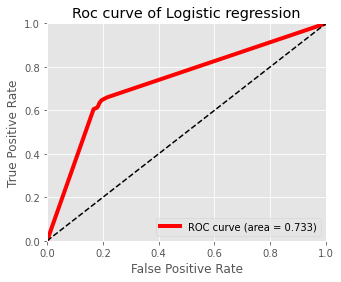

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

#의사결정 나무를 학습, 학습한 모델로 테스트 데이터셋에 대해 예측값을반환
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred  = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1]

#학습한 모델의 성능을 측정
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision_score: %.2f' % precision_score(y_test, y_pred))
print('recall_score: %.2f' % recall_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred))

false_positive_rate , true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC: %.3f' % roc_auc)
# ROC curve를 그래프 출력
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %.3f)" % roc_auc, color = 'red', linewidth = 4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve of Logistic regression')
plt.legend(loc = 'lower right')


# 모델 개선 : 피처 엔지니어링
- 더 좋은 분류 기법
- 더 많은 데이터


In [8]:
#분류 모델을 위해 전처리
df_train = pd.read_csv('./python-data-analysis-master/data/titanic_train.csv')
df_test = pd.read_csv('./python-data-analysis-master/data/titanic_test.csv')

df_train = df_train.drop(['ticket','body','home.dest'], axis = 1)
df_test = df_test.drop(['ticket','body','home.dest'], axis = 1)

# age의 결측값을 평균값으로 데체 
replace_mean = df_train[df_train['age'] > 0 ]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark 2개의 결측 값은 최빈 값으로 
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

#원핫 인코딩을 위한 통합 데이터 프레임 (whole_df)를 생성
whole_df = df_train.append(df_test)
train_idx_num =len(df_train)


In [9]:
print(whole_df['cabin'].value_counts()[:10])

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
D                  4
C78                4
F33                4
F2                 4
F4                 4
C22 C26            4
Name: cabin, dtype: int64


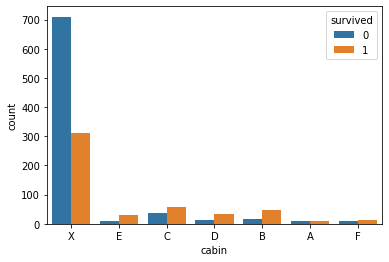

In [10]:
#결측 데이터의 경우 'X'로 대체 
whole_df['cabin'] = whole_df['cabin'].fillna('X')

#cabin 피처의 첫 번째 알파벳을 추출 (뒤쪽 번호를 지워준다 )
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

#추출한 알파벳 중 G와 T는 수가 너무 작기 때문에 마찬가지로 'X'로 대체 
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X', 'T':'X'})

ax =  sns.countplot(x='cabin', hue='survived', data = whole_df)
plt.show()

In [11]:
#이름에서 호칭을 추출한다 
name_grade = whole_df['name'].apply(lambda x: x.split(', ',1)[1].split('.')[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [12]:
#give_grade() 함수 whole_df의 name 피처를 A~F범주형 데이터로 변환

#호칭에 따라 사회적 지위 (1910년대 기준)을 정의
grade_dict = {'A': ['Rev', 'Col','Major','Dr','Capt','Sir'],
             'B' : ['Ms','Mme','Mrs','Dona'],
             'C ': ['Jonkheer','The Countess'],
             'D': ['Mr', 'Don'],
             'E':['Master'],
             'F':['Miss','Mile','Lady']}
#정의한 호칭의 기준에 따라 A-F의 문자로 name 피처를 다시 정의하는 함수이다
def give_grade(x):
    grade = x.split(', ',1)[1].split('.')[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade ==title:
                return key
    return 'G'

#위의 함수를 적용하여 name 피처를 새롭게 정의합니다 
whole_df['name'] = whole_df['name'].apply(lambda x : give_grade(x))
print(whole_df['name'].value_counts())

D     758
F     261
B     201
E      61
A      24
G       3
C       1
Name: name, dtype: int64


<AxesSubplot:xlabel='name', ylabel='count'>

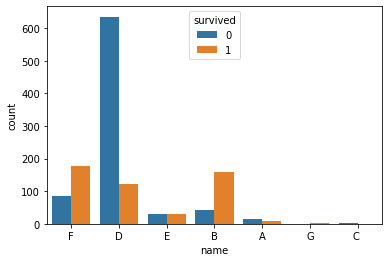

In [13]:
sns.countplot(x = 'name',hue = 'survived', data = whole_df)

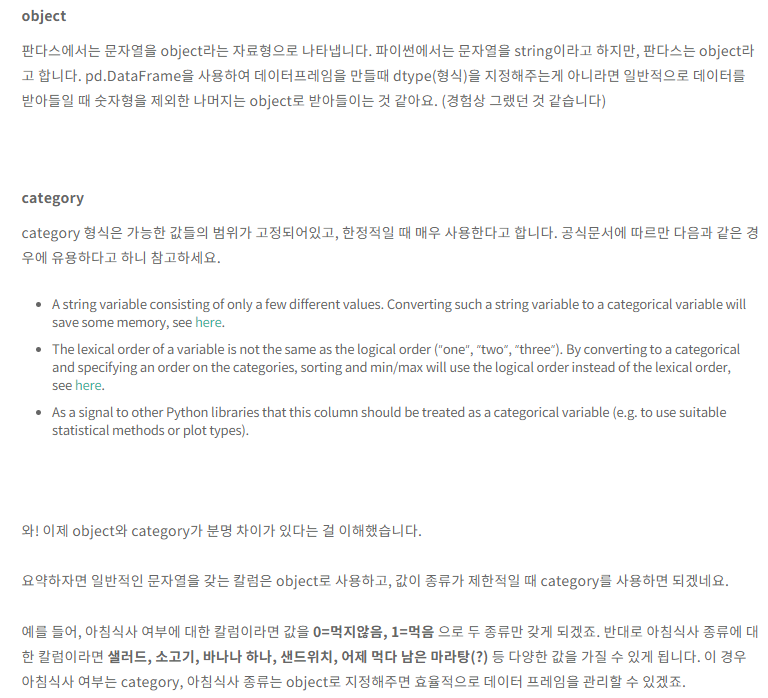

In [14]:
#원핫 인코딩
#판다스 패키지를 이용한 원-핫 인코딩을 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 0 to 915
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      916 non-null    int64  
 1   survived    916 non-null    int64  
 2   age         916 non-null    float64
 3   sibsp       916 non-null    int64  
 4   parch       916 non-null    int64  
 5   fare        916 non-null    float64
 6   name_A      916 non-null    uint8  
 7   name_B      916 non-null    uint8  
 8   name_C      916 non-null    uint8  
 9   name_D      916 non-null    uint8  
 10  name_E      916 non-null    uint8  
 11  name_F      916 non-null    uint8  
 12  name_G      916 non-null    uint8  
 13  sex_female  916 non-null    uint8  
 14  sex_male    916 non-null    uint8  
 15  cabin_A     916 non-null    uint8  
 16  cabin_B     916 non-null    uint8  
 17  cabin_C     916 non-null    uint8  
 18  cabin_D     916 non-null    uint8  
 19  cabin_E     916 non-null    u

accuracy: 0.80
precision_score: 0.74
recall_score: 0.71
f1_score: 0.73
AUC: 0.853
C:\Users\wodud\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


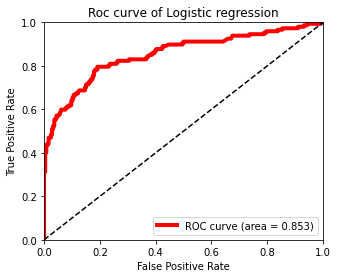

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#데이터를 학습과 테스트로 분리
x_train, y_train = df_train.loc[:,df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

#로지스틱 회귀 모델
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

#학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력을 합니다 
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision_score: %.2f' % precision_score(y_test, y_pred))
print('recall_score: %.2f' % recall_score(y_test, y_pred))
print('f1_score: %.2f' % f1_score(y_test, y_pred))

#AUC(Area Under Curve)을 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

#ROC curve를 그래프로 출력
plt.rcParams['figure.figsize'] = [5,4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %.3f)" % roc_auc, color = 'red', linewidth = 4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve of Logistic regression')
plt.legend(loc = 'lower right')


# 피처 영향력 살펴보기

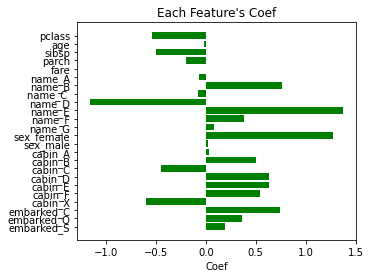

In [25]:
#예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환 (그래프의 y축)
cols = df_train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

#각 피처별 회귀 분석 계수를 그래프의 x축으로 피처 영향력 그래프를 출력
plt.rcParams['figure.figsize'] = [5,4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align = 'center', color='green', ecolor = 'black')
ax.set_yticks(y_pos)
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")
plt.show()

# 평가 : 모델검증

C:\Users\wodud\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\wodud\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

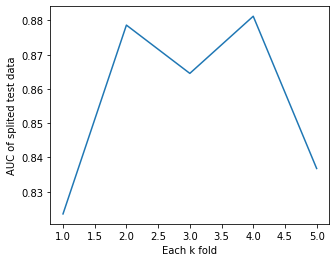

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#K-fold 교차 검증 수행
from sklearn.model_selection import KFold

#K-flod 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle = True, random_state= 0)
auc_history = []

#K-fold를 5번의 분할 학습 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    #5개로 분할된 fold중 4개를 학습 데이터셋 1개를 테스트 데이터 셋으로 지정 매 반복시마다 테스트 데이터셋이 바뀐다 
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test =whole_df_encoded.iloc[test_data_row]

    #survived 피처를 y, 나머지 피처들을 x데이터롤 지정
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != 'survived'].values, df_test['survived'].values

    #주어진 데이터로 로지스틱 회귀 모델을 학습합니다
    lr = LogisticRegression(random_state = 0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:,1]

    #테스트 데이터셋의 AUC를 계산하여 auc_history에 저장합니다
    false_positive_rate, true_positive_rate, thresholds = roc_curve(splited_y_test, y_pred_probability)
    roc_auc = roc_auc_score(splited_y_test, y_pred_probability)
    auc_history.append(roc_auc)

#auc_history에 저장된 다섯번의 학습 결과 (AUC)를 그래프로 출력합니다
plt.xlabel("Each k fold")
plt.ylabel("AUC of splited test data")
plt.plot(range(1, k+1), auc_history) #baseline




C:\Users\wodud\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\wodud\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

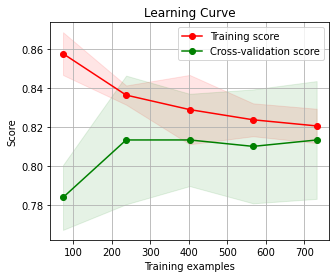

In [30]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()